In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

sns.set_theme(style = 'whitegrid', context='talk', palette='Greys')

# Selection of the best classifier

In [2]:
mlp = load('bias_symptoms_mlp.joblib')
rf = load('bias_symptoms_rf.joblib')
xgb = load('bias_symptoms_xgb.joblib')

In [3]:
data = pd.read_csv('data/bias_symptoms.csv', index_col=[0,1])
data.index = data.index.droplevel(0)
labels = ['statistical_parity', 'equal_opportunity', 'average_odds']

In [4]:
# AUC

sp_mlp_train = []
sp_rf_train = []
sp_xgb_train = []
sp_mlp_test = []
sp_rf_test = []
sp_xgb_test = []

eo_mlp_train = []
eo_rf_train = []
eo_xgb_train = []
eo_mlp_test = []
eo_rf_test = []
eo_xgb_test = []

ao_mlp_train = []
ao_rf_train = []
ao_xgb_train = []
ao_mlp_test = []
ao_rf_test = []
ao_xgb_test = []

# Average Precision

sp_mlp_train_ap = []
sp_rf_train_ap = []
sp_xgb_train_ap = []
sp_mlp_test_ap = []
sp_rf_test_ap = []
sp_xgb_test_ap = []

eo_mlp_train_ap = []
eo_rf_train_ap = []
eo_xgb_train_ap = []
eo_mlp_test_ap = []
eo_rf_test_ap = []
eo_xgb_test_ap = []

ao_mlp_train_ap = []
ao_rf_train_ap = []
ao_xgb_train_ap = []
ao_mlp_test_ap = []
ao_rf_test_ap = []
ao_xgb_test_ap = []

# Precision

sp_mlp_train_prec = []
sp_rf_train_prec = []
sp_xgb_train_prec = []
sp_mlp_test_prec = []
sp_rf_test_prec = []
sp_xgb_test_prec = []

eo_mlp_train_prec = []
eo_rf_train_prec = []
eo_xgb_train_prec = []
eo_mlp_test_prec = []
eo_rf_test_prec = []
eo_xgb_test_prec = []

ao_mlp_train_prec = []
ao_rf_train_prec = []
ao_xgb_train_prec = []
ao_mlp_test_prec = []
ao_rf_test_prec = []
ao_xgb_test_prec = []

# Recall

sp_mlp_train_rec = []
sp_rf_train_rec = []
sp_xgb_train_rec = []
sp_mlp_test_rec = []
sp_rf_test_rec = []
sp_xgb_test_rec = []

eo_mlp_train_rec = []
eo_rf_train_rec = []
eo_xgb_train_rec = []
eo_mlp_test_rec = []
eo_rf_test_rec = []
eo_xgb_test_rec = []

ao_mlp_train_rec = []
ao_rf_train_rec = []
ao_xgb_train_rec = []
ao_mlp_test_rec = []
ao_rf_test_rec = []
ao_xgb_test_rec = []

# F1 Score

sp_mlp_train_f1 = []
sp_rf_train_f1 = []
sp_xgb_train_f1 = []
sp_mlp_test_f1 = []
sp_rf_test_f1 = []
sp_xgb_test_f1 = []

eo_mlp_train_f1 = []
eo_rf_train_f1 = []
eo_xgb_train_f1 = []
eo_mlp_test_f1 = []
eo_rf_test_f1 = []
eo_xgb_test_f1 = []

ao_mlp_train_f1 = []
ao_rf_train_f1 = []
ao_xgb_train_f1 = []
ao_mlp_test_f1 = []
ao_rf_test_f1 = []
ao_xgb_test_f1 = []

# Accuracy

sp_mlp_train_acc = []
sp_rf_train_acc = []
sp_xgb_train_acc = []
sp_mlp_test_acc = []
sp_rf_test_acc = []
sp_xgb_test_acc = []

eo_mlp_train_acc = []
eo_rf_train_acc = []
eo_xgb_train_acc = []
eo_mlp_test_acc = []
eo_rf_test_acc = []
eo_xgb_test_acc = []

ao_mlp_train_acc = []
ao_rf_train_acc = []
ao_xgb_train_acc = []
ao_mlp_test_acc = []
ao_rf_test_acc = []
ao_xgb_test_acc = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler()
for itrain, itest in kfold.split(data.index.unique().values):
    train_index = data.index.unique()[itrain]
    test_index = data.index.unique()[itest]
    print(train_index)
    print(test_index)
    train = data.loc[train_index]
    test = data.loc[test_index]

    mlp.fit(train.drop(columns=labels), train[labels])
    rf.fit(train.drop(columns=labels), train[labels])
    xgb.fit(train.drop(columns=labels), train[labels])

    mlp_train = mlp.predict_proba(train.drop(columns=labels))
    rf_train = rf.predict_proba(train.drop(columns=labels))
    xgb_train = xgb.predict_proba(train.drop(columns=labels))
    mlp_test = mlp.predict_proba(test.drop(columns=labels))
    rf_test = rf.predict_proba(test.drop(columns=labels))
    xgb_test = xgb.predict_proba(test.drop(columns=labels))

    mlp_train_pred = mlp.predict(train.drop(columns=labels))
    rf_train_pred = rf.predict(train.drop(columns=labels))
    xgb_train_pred = xgb.predict(train.drop(columns=labels))
    mlp_test_pred = mlp.predict(test.drop(columns=labels))
    rf_test_pred = rf.predict(test.drop(columns=labels))
    xgb_test_pred = xgb.predict(test.drop(columns=labels))

    sp_mlp_train.append(roc_auc_score(train["statistical_parity"], mlp_train[:, 0]))
    sp_rf_train.append(roc_auc_score(train["statistical_parity"], rf_train[0][:, 1]))
    sp_xgb_train.append(roc_auc_score(train["statistical_parity"], xgb_train[:, 0]))
    sp_mlp_test.append(roc_auc_score(test["statistical_parity"], mlp_test[:, 0]))
    sp_rf_test.append(roc_auc_score(test["statistical_parity"], rf_test[0][:, 1]))
    sp_xgb_test.append(roc_auc_score(test["statistical_parity"], xgb_test[:, 0]))

    eo_mlp_train.append(roc_auc_score(train["equal_opportunity"], mlp_train[:, 1]))
    eo_rf_train.append(roc_auc_score(train["equal_opportunity"], rf_train[1][:, 1]))
    eo_xgb_train.append(roc_auc_score(train["equal_opportunity"], xgb_train[:, 1]))
    eo_mlp_test.append(roc_auc_score(test["equal_opportunity"], mlp_test[:, 1]))
    eo_rf_test.append(roc_auc_score(test["equal_opportunity"], rf_test[1][:, 1]))
    eo_xgb_test.append(roc_auc_score(test["equal_opportunity"], xgb_test[:, 1]))

    ao_mlp_train.append(roc_auc_score(train["average_odds"], mlp_train[:, 2]))
    ao_rf_train.append(roc_auc_score(train["average_odds"], rf_train[2][:, 1]))
    ao_xgb_train.append(roc_auc_score(train["average_odds"], xgb_train[:, 2]))
    ao_mlp_test.append(roc_auc_score(test["average_odds"], mlp_test[:, 2]))
    ao_rf_test.append(roc_auc_score(test["average_odds"], rf_test[2][:, 1]))
    ao_xgb_test.append(roc_auc_score(test["average_odds"], xgb_test[:, 2]))

    sp_mlp_train_ap.append(average_precision_score(train["statistical_parity"], mlp_train[:, 0]))
    sp_rf_train_ap.append(average_precision_score(train["statistical_parity"], rf_train[0][:, 1]))
    sp_xgb_train_ap.append(average_precision_score(train["statistical_parity"], xgb_train[:, 0]))
    sp_mlp_test_ap.append(average_precision_score(test["statistical_parity"], mlp_test[:, 0]))
    sp_rf_test_ap.append(average_precision_score(test["statistical_parity"], rf_test[0][:, 1]))
    sp_xgb_test_ap.append(average_precision_score(test["statistical_parity"], xgb_test[:, 0]))

    eo_mlp_train_ap.append(average_precision_score(train["equal_opportunity"], mlp_train[:, 1]))
    eo_rf_train_ap.append(average_precision_score(train["equal_opportunity"], rf_train[1][:, 1]))
    eo_xgb_train_ap.append(average_precision_score(train["equal_opportunity"], xgb_train[:, 1]))
    eo_mlp_test_ap.append(average_precision_score(test["equal_opportunity"], mlp_test[:, 1]))
    eo_rf_test_ap.append(average_precision_score(test["equal_opportunity"], rf_test[1][:, 1]))
    eo_xgb_test_ap.append(average_precision_score(test["equal_opportunity"], xgb_test[:, 1]))

    ao_mlp_train_ap.append(average_precision_score(train["average_odds"], mlp_train[:, 2]))
    ao_rf_train_ap.append(average_precision_score(train["average_odds"], rf_train[2][:, 1]))
    ao_xgb_train_ap.append(average_precision_score(train["average_odds"], xgb_train[:, 2]))
    ao_mlp_test_ap.append(average_precision_score(test["average_odds"], mlp_test[:, 2]))
    ao_rf_test_ap.append(average_precision_score(test["average_odds"], rf_test[2][:, 1]))
    ao_xgb_test_ap.append(average_precision_score(test["average_odds"], xgb_test[:, 2]))

    sp_mlp_train_prec.append(precision_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_prec.append(precision_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_prec.append(precision_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_prec.append(precision_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_prec.append(precision_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_prec.append(precision_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_prec.append(precision_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_prec.append(precision_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_prec.append(precision_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_prec.append(precision_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_prec.append(precision_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_prec.append(precision_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_prec.append(precision_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_prec.append(precision_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_prec.append(precision_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_prec.append(precision_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_prec.append(precision_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_prec.append(precision_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_rec.append(recall_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_rec.append(recall_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_rec.append(recall_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_rec.append(recall_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_rec.append(recall_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_rec.append(recall_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_rec.append(recall_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_rec.append(recall_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_rec.append(recall_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_rec.append(recall_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_rec.append(recall_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_rec.append(recall_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_rec.append(recall_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_rec.append(recall_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_rec.append(recall_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_rec.append(recall_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_rec.append(recall_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_rec.append(recall_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_f1.append(f1_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_f1.append(f1_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_f1.append(f1_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_f1.append(f1_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_f1.append(f1_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_f1.append(f1_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_f1.append(f1_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_f1.append(f1_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_f1.append(f1_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_f1.append(f1_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_f1.append(f1_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_f1.append(f1_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_f1.append(f1_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_f1.append(f1_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_f1.append(f1_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_f1.append(f1_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_f1.append(f1_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_f1.append(f1_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_acc.append(accuracy_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_acc.append(accuracy_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_acc.append(accuracy_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_acc.append(accuracy_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_acc.append(accuracy_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_acc.append(accuracy_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_acc.append(accuracy_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_acc.append(accuracy_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_acc.append(accuracy_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_acc.append(accuracy_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_acc.append(accuracy_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_acc.append(accuracy_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_acc.append(accuracy_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_acc.append(accuracy_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_acc.append(accuracy_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_acc.append(accuracy_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_acc.append(accuracy_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_acc.append(accuracy_score(test["average_odds"], xgb_test_pred[:, 2]))

Index(['arrhythmia', 'bank', 'cmc', 'compas', 'credit', 'crime', 'diabetic',
       'german', 'health', 'ibm', 'law', 'medical', 'obesity', 'placement',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['adult', 'drug', 'hearth', 'park', 'resyduo'], dtype='object', name='data')
Index(['adult', 'bank', 'cmc', 'compas', 'crime', 'diabetic', 'drug', 'health',
       'hearth', 'ibm', 'medical', 'obesity', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['arrhythmia', 'credit', 'german', 'law', 'us'], dtype='object', name='data')
Index(['adult', 'arrhythmia', 'credit', 'crime', 'diabetic', 'drug', 'german',
       'health', 'hearth', 'law', 'medical', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['bank', 'cmc', 'compas', 'ibm', 'obesity'], dtype='object', name='data')
Index(['adult', 'arrhythmia'

In [5]:
def get_full_metrics(sp_mlp_train, sp_rf_train, sp_xgb_train, sp_mlp_test, sp_rf_test, sp_xgb_test, eo_mlp_train, eo_rf_train, eo_xgb_train, eo_mlp_test, eo_rf_test, eo_xgb_test, ao_mlp_train, ao_rf_train, ao_xgb_train, ao_mlp_test, ao_rf_test, ao_xgb_test):
    df_sp = pd.DataFrame(
        {"MLP": sp_mlp_train, "RF": sp_rf_train, "XGB": sp_xgb_train, "Fold": "Train"}
    )
    df_sp = pd.concat(
        [
            df_sp,
            pd.DataFrame(
                {"MLP": sp_mlp_test, "RF": sp_rf_test, "XGB": sp_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_sp = pd.melt(df_sp, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_sp["Metric"] = "Statistical Parity"
    df_eo = pd.DataFrame(
        {"MLP": eo_mlp_train, "RF": eo_rf_train, "XGB": eo_xgb_train, "Fold": "Train"}
    )
    df_eo = pd.concat(
        [
            df_eo,
            pd.DataFrame(
                {"MLP": eo_mlp_test, "RF": eo_rf_test, "XGB": eo_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_eo = pd.melt(df_eo, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_eo["Metric"] = "Equal Opportunity"

    df_ao = pd.DataFrame(
        {"MLP": ao_mlp_train, "RF": ao_rf_train, "XGB": ao_xgb_train, "Fold": "Train"}
    )
    df_ao = pd.concat(
        [
            df_ao,
            pd.DataFrame(
                {"MLP": ao_mlp_test, "RF": ao_rf_test, "XGB": ao_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_ao = pd.melt(df_ao, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_ao["Metric"] = "Average Odds"
    auc = pd.concat([df_sp, df_eo, df_ao])
    return auc

## AUC Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


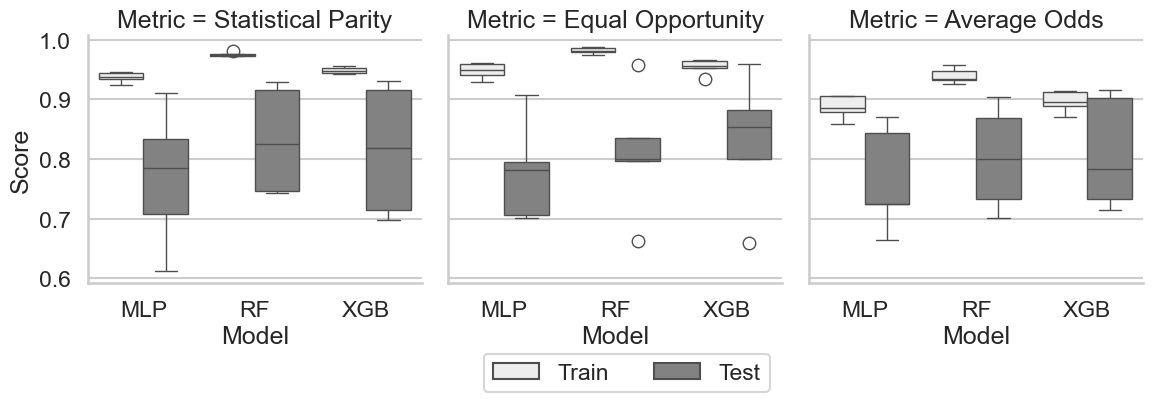

In [10]:
auc = get_full_metrics(sp_mlp_train, sp_rf_train, sp_xgb_train, sp_mlp_test, sp_rf_test, sp_xgb_test, eo_mlp_train, eo_rf_train, eo_xgb_train, eo_mlp_test, eo_rf_test, eo_xgb_test, ao_mlp_train, ao_rf_train, ao_xgb_train, ao_mlp_test, ao_rf_test, ao_xgb_test)
g = sns.FacetGrid(auc, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
# g.fig.suptitle('AUC Score')
g.fig.subplots_adjust(top=0.85)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.savefig('figs/auc.png', dpi=300)
g.savefig('figs/auc.pdf', bbox_inches='tight')
plt.show()

## Average Precision Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


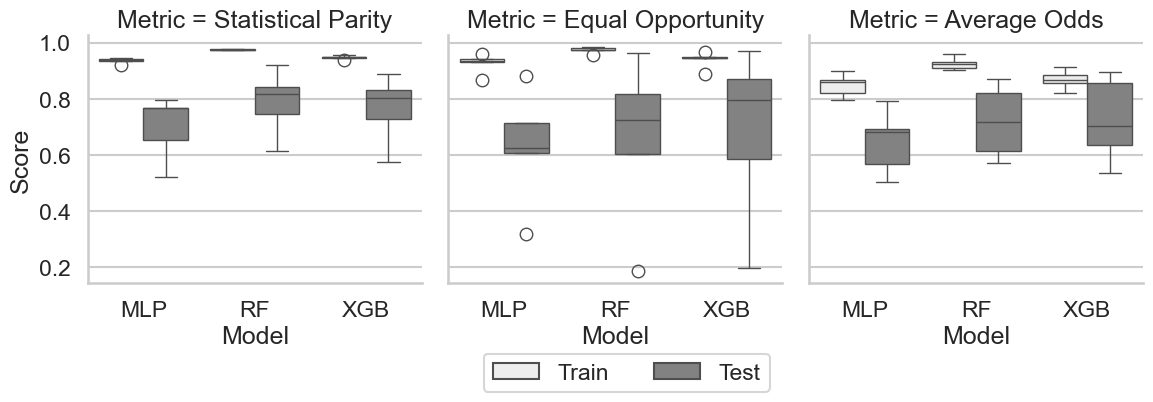

In [11]:
ap = get_full_metrics(sp_mlp_train_ap, sp_rf_train_ap, sp_xgb_train_ap, sp_mlp_test_ap, sp_rf_test_ap, sp_xgb_test_ap, eo_mlp_train_ap, eo_rf_train_ap, eo_xgb_train_ap, eo_mlp_test_ap, eo_rf_test_ap, eo_xgb_test_ap, ao_mlp_train_ap, ao_rf_train_ap, ao_xgb_train_ap, ao_mlp_test_ap, ao_rf_test_ap, ao_xgb_test_ap)
g = sns.FacetGrid(ap, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
# g.fig.suptitle('AUC Score')
g.fig.subplots_adjust(top=0.85)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.savefig("figs/ap.png", dpi=300)
g.savefig("figs/ap.pdf", bbox_inches="tight")
plt.show()

## Precision

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


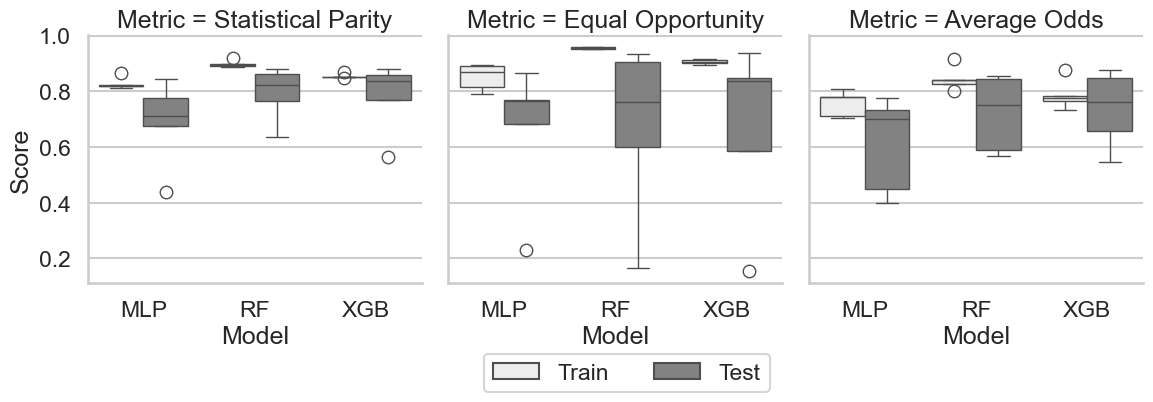

In [12]:
prec = get_full_metrics(sp_mlp_train_prec, sp_rf_train_prec, sp_xgb_train_prec, sp_mlp_test_prec, sp_rf_test_prec, sp_xgb_test_prec, eo_mlp_train_prec, eo_rf_train_prec, eo_xgb_train_prec, eo_mlp_test_prec, eo_rf_test_prec, eo_xgb_test_prec, ao_mlp_train_prec, ao_rf_train_prec, ao_xgb_train_prec, ao_mlp_test_prec, ao_rf_test_prec, ao_xgb_test_prec)
g = sns.FacetGrid(prec, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("F1 Score")
g.fig.savefig("figs/prec.png", dpi=300)
g.figure.savefig("figs/prec.pdf", bbox_inches="tight")
plt.show()

## Recall

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


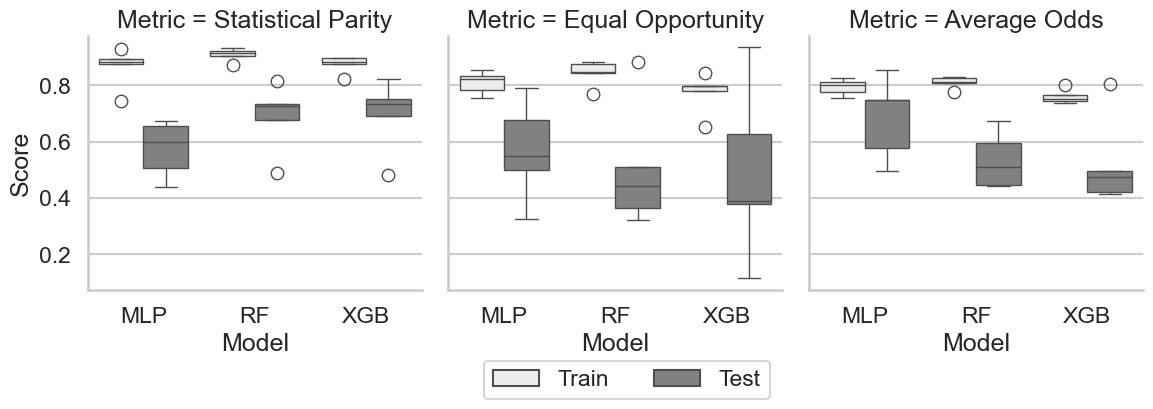

In [13]:
rec = get_full_metrics(sp_mlp_train_rec, sp_rf_train_rec, sp_xgb_train_rec, sp_mlp_test_rec, sp_rf_test_rec, sp_xgb_test_rec, eo_mlp_train_rec, eo_rf_train_rec, eo_xgb_train_rec, eo_mlp_test_rec, eo_rf_test_rec, eo_xgb_test_rec, ao_mlp_train_rec, ao_rf_train_rec, ao_xgb_train_rec, ao_mlp_test_rec, ao_rf_test_rec, ao_xgb_test_rec)
g = sns.FacetGrid(rec, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("Recall")
g.fig.savefig("figs/rec.png", dpi=300)
g.figure.savefig("figs/rec.pdf", bbox_inches="tight")
plt.show()

## F1 Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


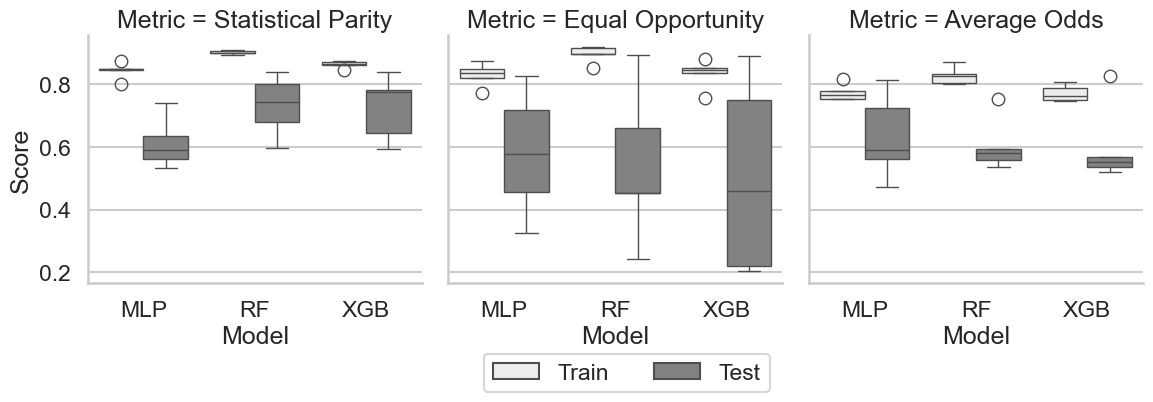

In [14]:
f1 = get_full_metrics(sp_mlp_train_f1, sp_rf_train_f1, sp_xgb_train_f1, sp_mlp_test_f1, sp_rf_test_f1, sp_xgb_test_f1, eo_mlp_train_f1, eo_rf_train_f1, eo_xgb_train_f1, eo_mlp_test_f1, eo_rf_test_f1, eo_xgb_test_f1, ao_mlp_train_f1, ao_rf_train_f1, ao_xgb_train_f1, ao_mlp_test_f1, ao_rf_test_f1, ao_xgb_test_f1)
g = sns.FacetGrid(f1, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("F1 Score")
g.fig.savefig("figs/f1.png", dpi=300)
g.figure.savefig("figs/f1.pdf", bbox_inches="tight")
plt.show()

## Accuracy Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


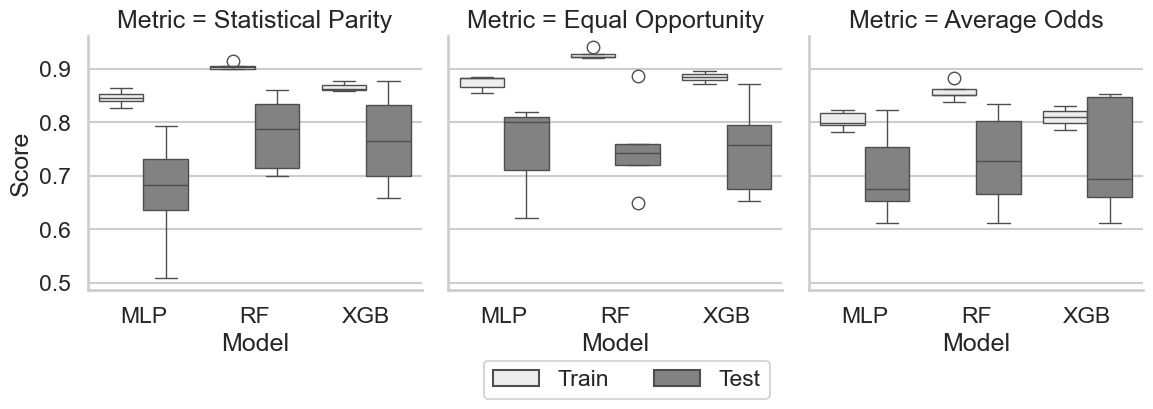

In [15]:
acc = get_full_metrics(sp_mlp_train_acc, sp_rf_train_acc, sp_xgb_train_acc, sp_mlp_test_acc, sp_rf_test_acc, sp_xgb_test_acc, eo_mlp_train_acc, eo_rf_train_acc, eo_xgb_train_acc, eo_mlp_test_acc, eo_rf_test_acc, eo_xgb_test_acc, ao_mlp_train_acc, ao_rf_train_acc, ao_xgb_train_acc, ao_mlp_test_acc, ao_rf_test_acc, ao_xgb_test_acc)
g = sns.FacetGrid(acc, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("Accuracy Score")
g.savefig("figs/acc.png", dpi=300)
g.savefig("figs/acc.pdf", bbox_inches="tight")
plt.show()

## Feature Importance

In [16]:
from xgboost import plot_importance
from sklearn.inspection import permutation_importance

In [17]:
xgb.fit(data.drop(columns=labels), data[labels])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

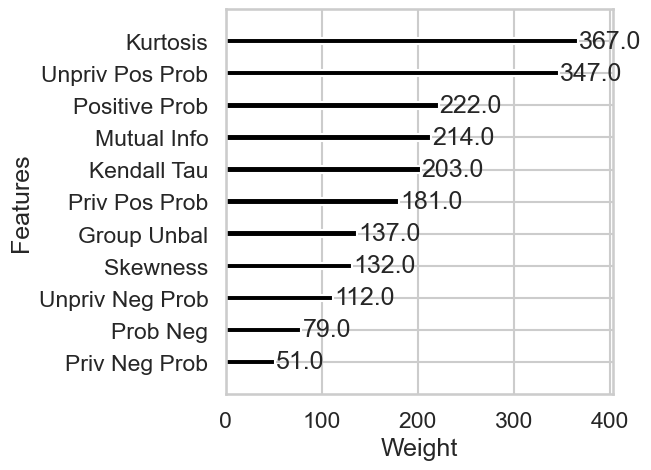

In [19]:
fig = plt.figure(figsize=(5, 5))
ax = plot_importance(xgb, ax=fig.add_subplot(111), color="black", importance_type="weight", xlabel="Weight")
ax.set_title("")
tick_labels = [
    "Kurtosis",
    "Unpriv Pos Prob",
    "Positive Prob",
    "Mutual Info",
    "Kendall Tau",
    "Priv Pos Prob",
    "Group Unbal",
    "Skewness",
    "Unpriv Neg Prob",
    "Prob Neg",
    "Priv Neg Prob",
]
tick_labels.reverse()
ax.set_yticklabels(tick_labels)
plt.savefig("figs/xgb_importance.pdf", bbox_inches="tight")

### Permutation Importance

In [20]:
result = permutation_importance(xgb, data.drop(columns=labels), data[labels], scoring='average_precision', n_jobs=-1, n_repeats=10)

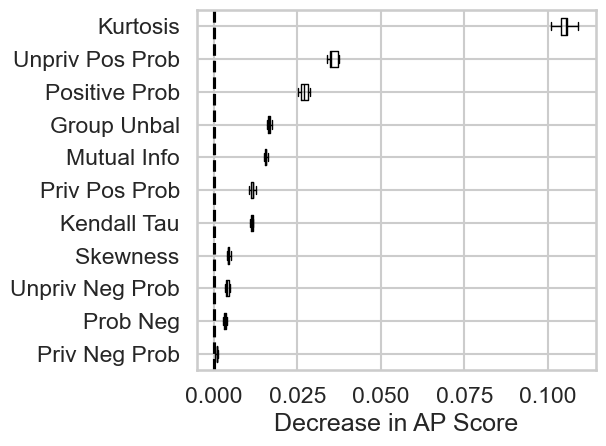

In [22]:
sorted_importances_idx = result['importances_mean'].argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=data.drop(columns=labels).columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10, color="black")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in AP Score")
tick_labels = [
        "Kurtosis",
        "Unpriv Pos Prob",
        "Positive Prob",
        "Group Unbal",
        "Mutual Info",
        "Priv Pos Prob",
        "Kendall Tau",
        "Skewness",
        "Unpriv Neg Prob",
        "Prob Neg",
        "Priv Neg Prob",
    ]
tick_labels.reverse()
ax.set_yticklabels(tick_labels)
ax.figure.tight_layout()
plt.savefig('figs/perm_importance.pdf')

## Symptoms significance

In [10]:
meta = pd.read_csv('data/metafeatures.csv', index_col=[0,1])
meta.index = meta.index.droplevel(0)

In [11]:
# AUC

sp_xgb_meta = []
eo_xgb_meta = []
ao_xgb_meta = []

# F1 Score

sp_xgb_test_f1 = []
eo_xgb_test_f1 = []
ao_xgb_test_f1 = []

# Accuracy

meta_sp_xgb_test_acc = []
meta_eo_xgb_test_acc = []
meta_ao_xgb_test_acc = []

labels = ["statistical_parity", "equal_opportunity", "average_odds"]

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for itrain, itest in kfold.split(meta.index.unique().values):
    train_index = meta.index.unique()[itrain]
    test_index = meta.index.unique()[itest]
    print(train_index)
    print(test_index)
    train = meta.loc[train_index]
    test = meta.loc[test_index]
    xgb.fit(train.drop(columns=labels), train[labels])

    xgb_test = xgb.predict_proba(test.drop(columns=labels))
    xgb_test_pred = xgb.predict(test.drop(columns=labels))

    sp_xgb_meta.append(roc_auc_score(test["statistical_parity"], xgb_test[:, 0]))
    eo_xgb_meta.append(roc_auc_score(test["equal_opportunity"], xgb_test[:, 1]))
    ao_xgb_meta.append(roc_auc_score(test["average_odds"], xgb_test[:, 2]))

    meta_sp_xgb_test_acc.append(
        accuracy_score(test["statistical_parity"], xgb_test_pred[:, 0])
    )
    meta_eo_xgb_test_acc.append(
        accuracy_score(test["equal_opportunity"], xgb_test_pred[:, 1])
    )
    meta_ao_xgb_test_acc.append(
        accuracy_score(test["average_odds"], xgb_test_pred[:, 2])
    )

Index(['arrhythmia', 'bank', 'cmc', 'compas', 'credit', 'crime', 'diabetic',
       'german', 'health', 'ibm', 'law', 'medical', 'obesity', 'placement',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['adult', 'drug', 'hearth', 'park', 'resyduo'], dtype='object', name='data')
Index(['adult', 'bank', 'cmc', 'compas', 'crime', 'diabetic', 'drug', 'health',
       'hearth', 'ibm', 'medical', 'obesity', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['arrhythmia', 'credit', 'german', 'law', 'us'], dtype='object', name='data')
Index(['adult', 'arrhythmia', 'credit', 'crime', 'diabetic', 'drug', 'german',
       'health', 'hearth', 'law', 'medical', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['bank', 'cmc', 'compas', 'ibm', 'obesity'], dtype='object', name='data')
Index(['adult', 'arrhythmia'

In [12]:
both = pd.read_csv('data/all_features.csv', index_col=[0,1])
both.index = both.index.droplevel(0)

In [13]:
all_sp_xgb_test_acc = []
all_eo_xgb_test_acc = []
all_ao_xgb_test_acc = []

all_sp_xgb_test_auc = []
all_eo_xgb_test_auc = []
all_ao_xgb_test_auc = []

labels = ["statistical_parity", "equal_opportunity", "average_odds"]

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for itrain, itest in kfold.split(both.index.unique().values):
    train_index = both.index.unique()[itrain]
    test_index = both.index.unique()[itest]
    print(train_index)
    print(test_index)
    train = both.loc[train_index]
    test = both.loc[test_index]
    xgb.fit(train.drop(columns=labels), train[labels])

    xgb_test = xgb.predict_proba(test.drop(columns=labels))
    xgb_test_pred = xgb.predict(test.drop(columns=labels))

    all_sp_xgb_test_auc.append(
        roc_auc_score(test["statistical_parity"], xgb_test[:, 0])
    )
    all_eo_xgb_test_auc.append(roc_auc_score(test["equal_opportunity"], xgb_test[:, 1]))
    all_ao_xgb_test_auc.append(roc_auc_score(test["average_odds"], xgb_test[:, 2]))

    all_sp_xgb_test_acc.append(
        accuracy_score(test["statistical_parity"], xgb_test_pred[:, 0])
    )
    all_eo_xgb_test_acc.append(
        accuracy_score(test["equal_opportunity"], xgb_test_pred[:, 1])
    )
    all_ao_xgb_test_acc.append(
        accuracy_score(test["average_odds"], xgb_test_pred[:, 2])
    )

Index(['arrhythmia', 'bank', 'cmc', 'compas', 'credit', 'crime', 'diabetic',
       'german', 'health', 'ibm', 'law', 'medical', 'obesity', 'placement',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['adult', 'drug', 'hearth', 'park', 'resyduo'], dtype='object', name='data')
Index(['adult', 'bank', 'cmc', 'compas', 'crime', 'diabetic', 'drug', 'health',
       'hearth', 'ibm', 'medical', 'obesity', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['arrhythmia', 'credit', 'german', 'law', 'us'], dtype='object', name='data')
Index(['adult', 'arrhythmia', 'credit', 'crime', 'diabetic', 'drug', 'german',
       'health', 'hearth', 'law', 'medical', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['bank', 'cmc', 'compas', 'ibm', 'obesity'], dtype='object', name='data')
Index(['adult', 'arrhythmia'

In [14]:
def data_comparison(symp_sp, meta_sp, all_sp, symp_eo, meta_eo, all_eo, symp_ao, meta_ao, all_ao, title):
    stat_par = pd.DataFrame(
        {
            "Symp": symp_sp,
            "Meta": meta_sp,
            "Both": all_sp,
        }
    )
    equal_opp = pd.DataFrame(
        {
            "Symp": symp_eo,
            "Meta": meta_eo,
            "Both": all_eo,
        }
    )

    avg_odds = pd.DataFrame(
        {
            "Symp": symp_ao,
            "Meta": meta_ao,
            "Both": all_ao,
        }
    )
    fig, ax = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
    sns.boxplot(data=stat_par, ax=ax[0])
    sns.boxplot(data=equal_opp, ax=ax[1])
    sns.boxplot(data=avg_odds, ax=ax[2])
    ax[0].set_title("Statistical parity")
    ax[1].set_title("Equal opportunity")
    ax[2].set_title("Average odds")
    plt.suptitle(title)
    plt.tight_layout()
    plt.savefig(f"figs/data_evaluation_{title}.png", dpi=300)
    plt.savefig(f"figs/data_evaluation_{title}.pdf", bbox_inches='tight')
    plt.show()

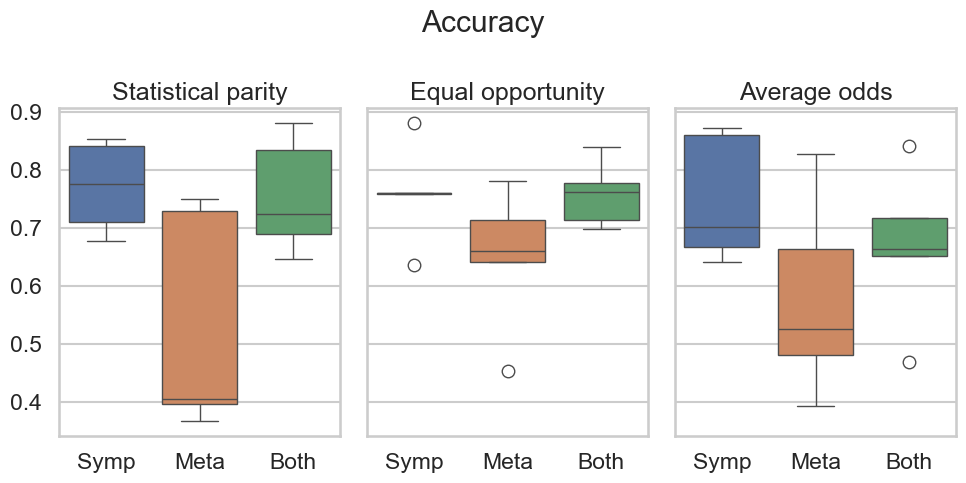

In [15]:
data_comparison(sp_xgb_test_acc, meta_sp_xgb_test_acc, all_sp_xgb_test_acc, eo_xgb_test_acc, meta_eo_xgb_test_acc, all_eo_xgb_test_acc, ao_xgb_test_acc, meta_ao_xgb_test_acc, all_ao_xgb_test_acc, "Accuracy")

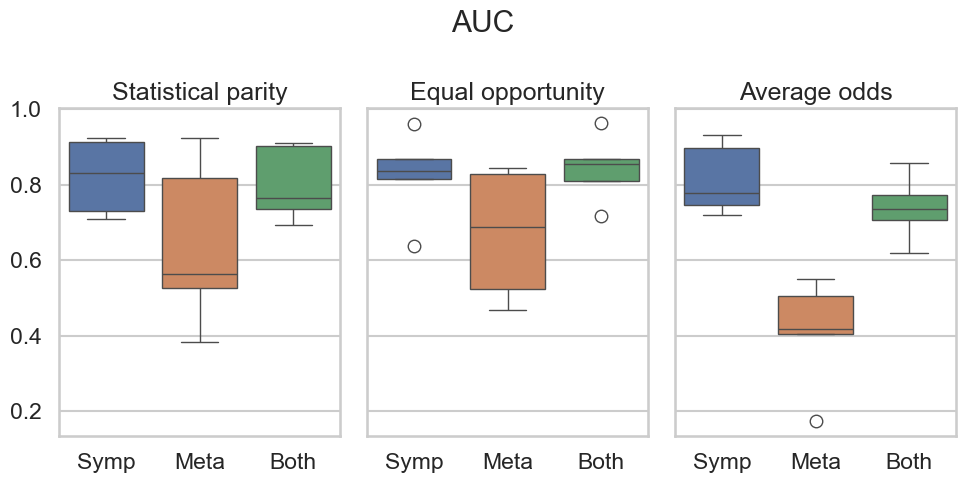

In [16]:
data_comparison(
    sp_xgb_test,
    sp_xgb_meta,
    all_sp_xgb_test_auc,
    eo_xgb_test,
    eo_xgb_meta,
    all_eo_xgb_test_auc,
    ao_xgb_test,
    ao_xgb_meta,
    all_ao_xgb_test_auc,
    "AUC",
)